In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns
import numpy.polynomial.polynomial as poly

In [2]:
filename = "Definitiva.csv"
data = pd.read_csv(filename, encoding='latin-1')

In [3]:
data.head()

,Fecha,Estado,Sector,Crédito Nominal,Exportación Nominal,Crédito Real,Exportación Real
0,01/01/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",254.0,11635.44,334.68,15331.16
1,01/04/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",281.0,10603.14,368.48,13904.00
2,01/07/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",288.0,12663.17,374.93,16485.44
3,01/10/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",343.0,12202.72,442.58,15745.29
4,01/10/2008,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",321.4,12651.98,390.60,15375.90


In [7]:
# date.sort(key = lambda date: datetime.strptime(date, '%d/%m/%Y')) # Sort the dates in order
Fechas = pd.date_range('01/01/2007','01/10/2017', 
              freq='3MS').strftime("%d/%m/%Y").tolist()
TipoFronteras = ['Sin Frontera', 'Frontera Norte', 'Frontera Sur']
Sectores = [' I. Sector agropecuario, silvícola y pesquero',
 ' II. Sector industrial',
 ' III. Sector servicios y otras actividades']
#set(data['Sector'])

In [9]:
data_frontera = data.copy()

data_frontera['Tipo frontera']='Sin frontera'

for i in range(len(data_frontera)):
    estado = data_frontera.iloc[i,1]
    if estado=='Baja California ' or estado=='Sonora ' or estado=='Chihuahua ' or estado=='Coahuila ' or estado=='Nuevo León ' or estado=='Tamaulipas ':
        tipo='Frontera Norte'
    elif estado=='Chiapas ' or estado=='Tabasco ' or estado=='Campeche ' or estado=='Quintana Roo ':
        tipo='Frontera Sur'
    else:
        tipo='Sin Frontera'
    data_frontera.loc[i,'Tipo frontera'] = tipo

In [10]:
data_frontera.head()

,Fecha,Estado,Sector,Crédito Nominal,Exportación Nominal,Crédito Real,Exportación Real,Tipo frontera
0,01/01/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",254.0,11635.44,334.68,15331.16,Sin Frontera
1,01/04/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",281.0,10603.14,368.48,13904.00,Sin Frontera
2,01/07/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",288.0,12663.17,374.93,16485.44,Sin Frontera
3,01/10/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",343.0,12202.72,442.58,15745.29,Sin Frontera
4,01/10/2008,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",321.4,12651.98,390.60,15375.90,Sin Frontera


In [11]:
df_fronteras = []

df_fronteras = []
for fecha in Fechas:
    for frontera in TipoFronteras:
        for sector in Sectores:
            aux = data_frontera[(data_frontera['Tipo frontera']==frontera) & (data_frontera['Sector']==sector) & (data_frontera['Fecha']==fecha)]
            tot_credito = np.sum(aux[' Crédito Real '])
            tot_exportacion = np.sum(aux[' Exportación Real '])
            df_fronteras.append([fecha, frontera, sector, tot_credito, tot_exportacion])

In [12]:
pd_fronteras = pd.DataFrame(df_fronteras, columns=['Fecha', 'Tipo frontera', 'Sector', ' Crédito Real ', ' Exportación Real '])
pd_fronteras.head(15)

,Fecha,Tipo frontera,Sector,Crédito Real,Exportación Real
0,01/01/2007,Sin Frontera,"I. Sector agropecuario, silvícola y pesquero",17426.92,151886.15
1,01/01/2007,Sin Frontera,II. Sector industrial,204173.31,50442.98
2,01/01/2007,Sin Frontera,III. Sector servicios y otras actividades,312200.51,10599.29
3,01/01/2007,Frontera Norte,"I. Sector agropecuario, silvícola y pesquero",8847.85,339647.48
4,01/01/2007,Frontera Norte,II. Sector industrial,78154.28,77157.15
5,01/01/2007,Frontera Norte,III. Sector servicios y otras actividades,64885.40,2163.12
6,01/01/2007,Frontera Sur,"I. Sector agropecuario, silvícola y pesquero",723.37,104275.14
7,01/01/2007,Frontera Sur,II. Sector industrial,1573.24,3555.36
8,01/01/2007,Frontera Sur,III. Sector servicios y otras actividades,16537.51,159.92
9,01/04/2007,Sin Frontera,"I. Sector agropecuario, silvícola y pesquero",17233.24,168297.04


Text(0, 0.5, ' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013')

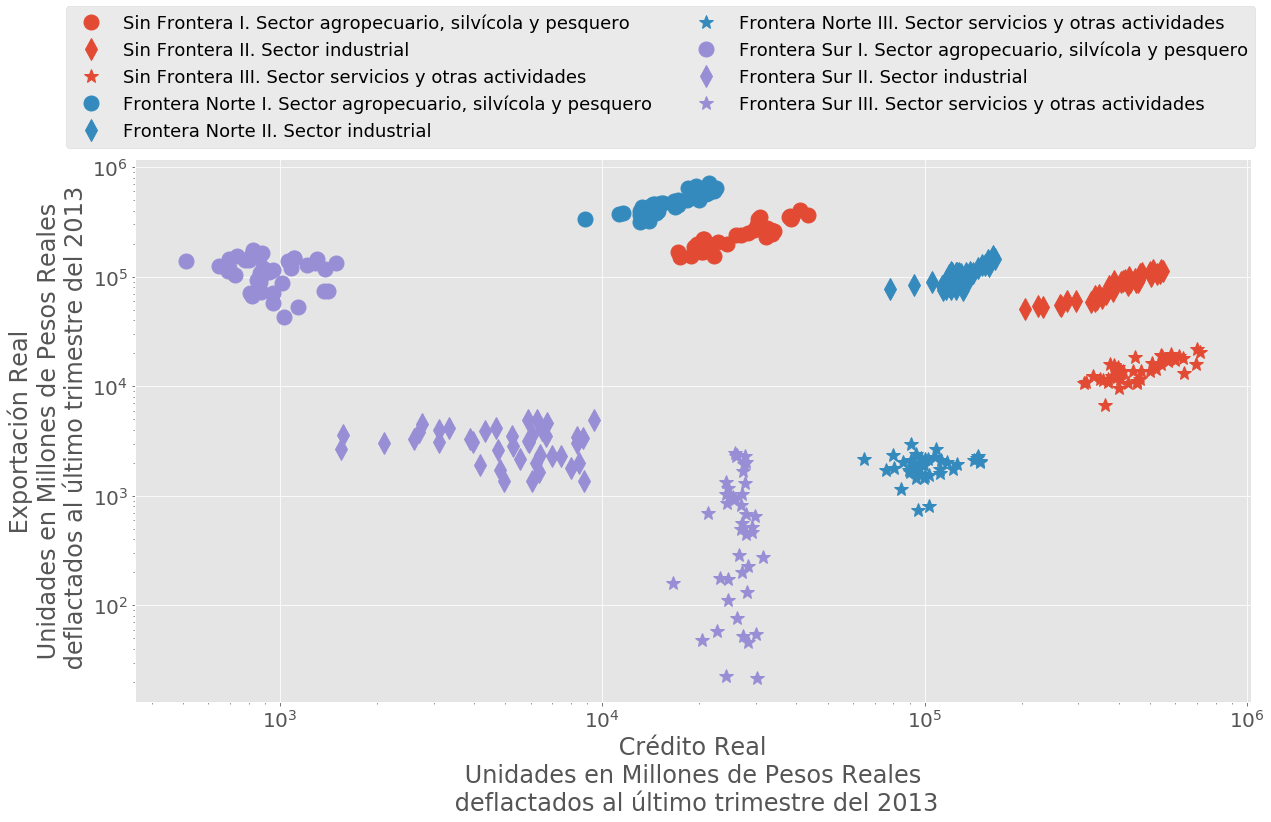

In [16]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))
ax = plt.gca()

markers= ['o', 'd', '*']

for frontera in TipoFronteras:
    color = next(ax._get_lines.prop_cycler)['color']
    for idx, sector in enumerate(Sectores):
        aux = pd_fronteras[(pd_fronteras['Tipo frontera']==frontera) & (pd_fronteras['Sector']==sector)]
        x = aux[' Crédito Real ']
        y = aux[' Exportación Real ']
        plt.plot(x, y, marker=markers[idx], ls='none', color=color, label=frontera+sector, markersize=15)


plt.legend(loc='center left', fontsize=18, bbox_to_anchor=(-0.07, 1.15), ncol=2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(' Crédito Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
plt.ylabel(' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
